# Angular Resolution
In this notebook we find the resolution as a function of polar angle from the beam's axis for the LHCb using the simulated data tuple.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utilities import Consts, Data, Cut
sys.path.append('../background_fitting/')
import bgfuncs as bf

In [23]:
fname, suffix = Consts().get_simulated_tuple()
data = Data(fname, suffix)

## Make Angular Features

In [24]:
fts = ['PZ', 'TRUEP_Z', 'PT', 'TRUEPT']
particles = ['L1']
bins = 150
features = [particle + "_" + feature for feature in fts for particle in particles]
df = data.fetch_features(features)

In [25]:
for particle in particles:
    df[particle + "_P"] = np.sqrt(df[particle + "_PZ"]**2 + df[particle + "_PT"]**2)
    df[particle + "_TRUEP"] = np.sqrt(df[particle + "_TRUEP_Z"]**2 + df[particle + "_TRUEPT"]**2)
    df[particle + "_theta"] = np.arcsin(df[particle + '_PT']/df[particle + '_P'])
    df[particle + "_Ttheta"] = np.arcsin(df[particle + '_TRUEPT']/df[particle + '_TRUEP'])
    df[particle + "_dtheta"] = np.arcsin(df[particle + "_theta"] - df[particle + "_Ttheta"])
    df.drop([particle + "_" + feature for feature in fts], axis=1, inplace=True)
    
df.head()

,L1_P,L1_TRUEP,L1_theta,L1_Ttheta,L1_dtheta
eventNumber,,,,,
4826,11297.693849,11338.020634,0.198427,0.198241,0.000186
4839,38010.813843,38027.371941,0.107528,0.107570,-0.000042
4844,55626.350731,55833.684325,0.050984,0.051020,-0.000037
1686,30724.463415,30844.637465,0.044307,0.043730,0.000578
1603,17153.754745,17102.486700,0.184014,0.184839,-0.000825


## Group Data into Bins

In [35]:
bin_edges = np.linspace(np.min(df['L1_dtheta'])-0.0001, np.max(df['L1_dtheta'])+0.0001, bins+1)
bin_width = bin_edges[1] - bin_edges[0]
bin_centr = np.array([np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges) - 1)])
quartiles = np.linspace(0., 1., bins+1)
df['Bin'] = pd.qcut(df['L1_dtheta'], q=quartiles, labels=np.arange(1, bins+1))
df.dropna(axis=0, inplace=True)

## Calculating Resolution in each Bin

In [86]:
g = df.groupby('Bin')
internal_bins = 30

all_data = []
for bin_number, group in g:
    hist_data, hist_bin_edges = np.histogram(group['L1_dtheta'].to_numpy(), internal_bins)
    hist_bin_centres = np.array([np.mean(hist_bin_edges[i:i+2]) for i in range(len(hist_bin_edges)-1)])
    d = np.array([hist_data, hist_bin_centres]).T
    # Remove all the empty bins across rows
    d = d[~np.any(d == 0, axis=1)]
    all_data.append(d)

In [94]:
y = [np.average(all_data[i][:,1], weights=all_data[i][:,0]) for i in range(bins)]

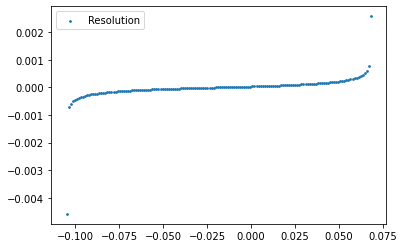

In [98]:
plt.scatter(bin_centr, y, s=3, label='Resolution')
plt.legend()
plt.show()

In [80]:
# Fit a gaussian to each bin to get the resolution (mean) and error on this value (sigma)
from scipy.optimize import curve_fit

def normal(x, mu, std):
    return (1/np.sqrt(2*np.pi*(std**2))) * np.exp(-((x-mu)**2)/(2*(std**2)))

fit_params = []
for i, bin_data in enumerate(all_data):
    try:
        popt, pcov = curve_fit(normal, bin_data[:,1], bin_data[:,0], p0=[1, np.mean(bin_data[:,1]), 1e-4])
        fit_params.append(popt)
    except:
        print(f'Stuck on bin: {i+1}')

Stuck on bin: 1
Stuck on bin: 2
Stuck on bin: 3
Stuck on bin: 4
Stuck on bin: 5
Stuck on bin: 6
Stuck on bin: 7
Stuck on bin: 8
Stuck on bin: 9
Stuck on bin: 10
Stuck on bin: 11
Stuck on bin: 12
Stuck on bin: 13
Stuck on bin: 14
Stuck on bin: 15
Stuck on bin: 16
Stuck on bin: 17
Stuck on bin: 18
Stuck on bin: 19
Stuck on bin: 20
Stuck on bin: 21
Stuck on bin: 22
Stuck on bin: 23
Stuck on bin: 24
Stuck on bin: 25
Stuck on bin: 26
Stuck on bin: 27
Stuck on bin: 28
Stuck on bin: 29
Stuck on bin: 30
Stuck on bin: 31
Stuck on bin: 32
Stuck on bin: 33
Stuck on bin: 34
Stuck on bin: 35
Stuck on bin: 36
Stuck on bin: 37
Stuck on bin: 38
Stuck on bin: 39
Stuck on bin: 40
Stuck on bin: 41
Stuck on bin: 42
Stuck on bin: 43
Stuck on bin: 44
Stuck on bin: 45
Stuck on bin: 46
Stuck on bin: 47
Stuck on bin: 48
Stuck on bin: 49
Stuck on bin: 50
Stuck on bin: 51
Stuck on bin: 52
Stuck on bin: 53
Stuck on bin: 54
Stuck on bin: 55
Stuck on bin: 56
Stuck on bin: 57
Stuck on bin: 58
Stuck on bin: 59
Stuck 